## S & P 500 Index Direction Prediction

### Problem specification

### Define the imports

In [22]:
import numpy as np
import pandas as pd
import keras.models as km
import keras.layers as kl
import sklearn.preprocessing as spp
import sklearn.model_selection as smo
import matplotlib.pylab as pl

%matplotlib inline

### Source the Problem Data

In [23]:
#stock_market_data = np.loadtxt("Data\S_Market_Data_ISRL.csv", delimiter=",")
stock_market_data_table = pd.read_csv("data/S_Market_Data_ISRL.csv", sep=",",index_col=0)
cols = stock_market_data_table.columns.values.tolist()
print("The S & P data contains the following columns:\n{}\n".format(cols))
stock_market_data_table.head()

The S & P data contains the following columns:
['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


### Let us explore the S & P 500 Index data

In [24]:
#!conda remove seaborn --yes
#!pip uninstall seaborn --yes
#!pip install seaborn --yes

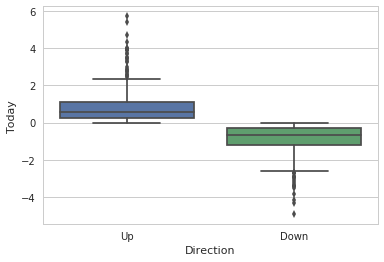

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
#stock_market_data_table.boxplot(column='Today', by='Direction')
a1 = sns.boxplot(x="Direction", y="Today", data=stock_market_data_table)
#ax = sns.stripplot(x="Direction", y="Today", data=stock_market_data_table)
#sns.(x="Direction", y="Today", data=stock_market_data_table)

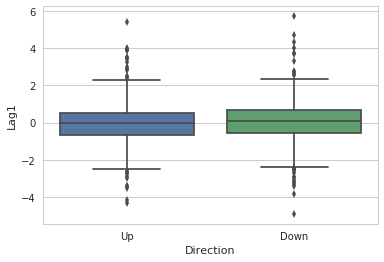

In [31]:
a2 = sns.boxplot(x="Direction", y="Lag1", data=stock_market_data_table)

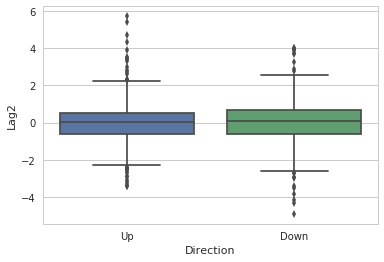

In [32]:
a2 = sns.boxplot(x="Direction", y="Lag2", data=stock_market_data_table)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f119937c6d8>,
      dtype=object)

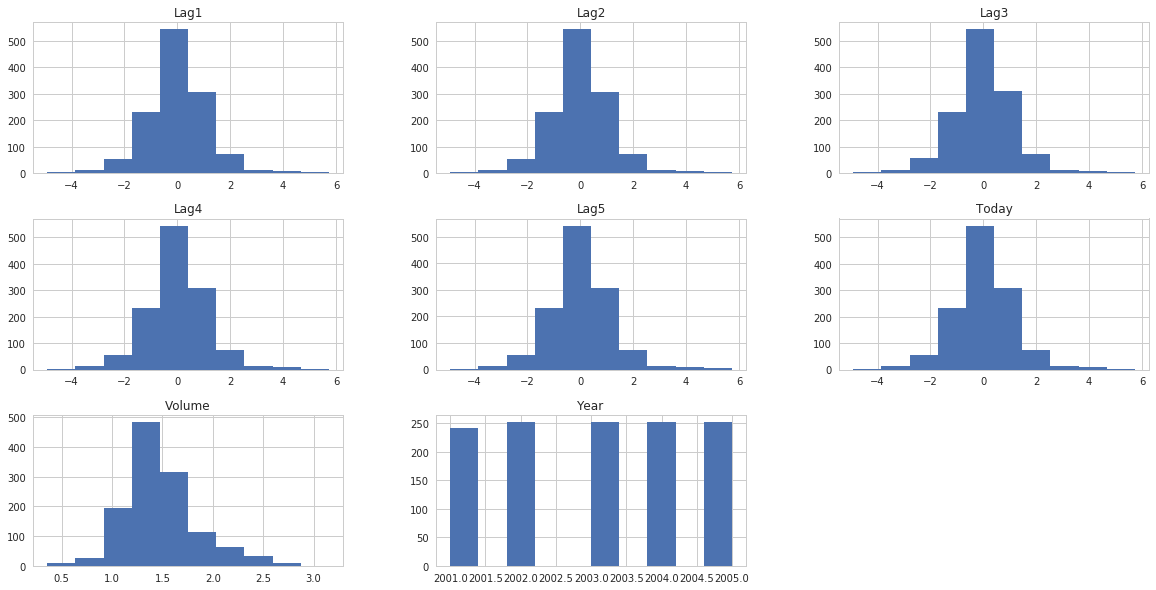

In [34]:
pl.rcParams["figure.figsize"] = (20,10)
stock_market_data_table.hist()

In [10]:
stock_market_data_table.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


In [40]:
stock_market_data_table.Direction = stock_market_data_table.Direction.apply(lambda x: 1 if x == 'Up' else 0) 

In [41]:
stock_market_data_table.count()

Year         1250
Lag1         1250
Lag2         1250
Lag3         1250
Lag4         1250
Lag5         1250
Volume       1250
Today        1250
Direction    1250
dtype: int64

### Analyse Feature correlation
 - Construct a Pearson Correlation Heatmap for the feature space

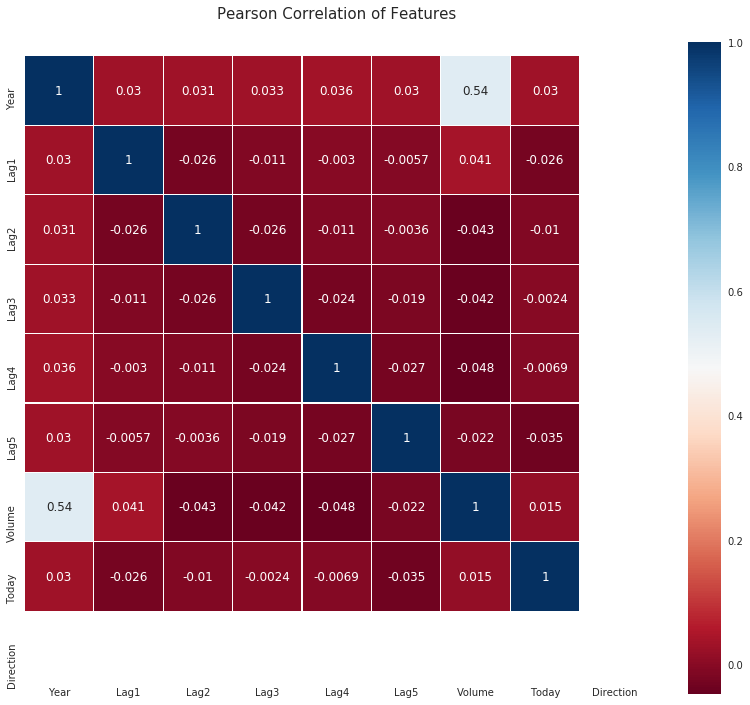

In [42]:
def plotPearsonHeatMap(data):
    colormap = pl.cm.RdBu
    pl.figure(figsize=(14,12))
    pl.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plotPearsonHeatMap(stock_market_data_table)

In [12]:
n_cols = len(cols) - 1
stock_market_data_table.columns = range(len(stock_market_data_table.columns))
stock_market_data = stock_market_data_table.as_matrix()
# #split into input (X) and output (Y) variables
X = stock_market_data[:,0:n_cols]
y = stock_market_data[:,n_cols]

In [13]:
scaler = spp.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scale_train, X_scale_test, y_train, y_test = smo.train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [15]:
model = km.Sequential()

In [16]:
model.add(kl.Dense(20, input_dim=n_cols, activation='relu'))
model.add(kl.Dense(10, activation='relu'))
model.add(kl.Dense(1, activation='sigmoid'))

### Visualize the Network

In [17]:
def visualizeNetwork(model):
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    SVG(model_to_dot(model).create(prog='dot', format='svg'))

#visualizeNetwork(model)

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_scale_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
875/875 [==============================] - 1s - loss: 0.7001 - acc: 0.5029     
Epoch 2/150
875/875 [==============================] - 0s - loss: 0.5960 - acc: 0.7623     
Epoch 3/150
875/875 [==============================] - 0s - loss: 0.4608 - acc: 0.8731     
Epoch 4/150
875/875 [==============================] - 0s - loss: 0.3277 - acc: 0.9154     
Epoch 5/150
875/875 [==============================] - 0s - loss: 0.2274 - acc: 0.9417     
Epoch 6/150
875/875 [==============================] - 0s - loss: 0.1663 - acc: 0.9737     
Epoch 7/150
875/875 [==============================] - 0s - loss: 0.1279 - acc: 0.9749     
Epoch 8/150
875/875 [==============================] - 0s - loss: 0.1048 - acc: 0.9783     
Epoch 9/150
875/875 [==============================] - 0s - loss: 0.0862 - acc: 0.9817     
Epoch 10/150
875/875 [==============================] - 0s - loss: 0.0758 - acc: 0.9840     
Epoch 11/150
875/875 [==============================] - 0s - loss: 0.0666 - acc

In [19]:
# evaluate the model
scores = model.evaluate(X_scale_test, y_test)
print("Evaluation with Test data:")
print("{0}: {1:.4f}".format(model.metrics_names[1].upper(), scores[1]*100))

 32/375 [=>............................] - ETA: 0sEvaluation with Test data:
ACC: 98.4000


In [1]:
from keras import metrics

Using TensorFlow backend.
